// 0x40 ~
// 0x7f : Memory 'in_r' (10 * 32b)
//        Word n : bit [31:0] - in_r[n]
// 0x80 ~
// 0xbf : Memory 'hist' (10 * 32b)
//        Word n : bit [31:0] - hist[n]
// (SC = Self Clear, COR = Clear on Read, TOW = Toggle on Write, COH = Clear on Handshake)


In [14]:
#import sys
import numpy as np
from time import time
import matplotlib.pyplot as plt 

#sys.path.append('/home/xilinx')
from pynq import Overlay
from pynq import allocate
ol = Overlay("histogram_1.bit")
ip = ol.histogram_0

INPUT_SIZE =10
VALUE_SIZE =10

inBuffer0 = allocate(shape=(INPUT_SIZE,), dtype=np.int32)
outBuffer0 = allocate(shape=(VALUE_SIZE,), dtype=np.int32)

#for i in range(SIZE):
#    inBuffer0[i] = int(i)
#    
inBuffer0 = np.array([3,1,3,2,2,4,4,0,3,5]);
print("inBuffer0\n",inBuffer0)

#----------------------------------------
for i in range(INPUT_SIZE):
    ip.write( 0x40+4*i, int(inBuffer0[i]))

ip.write(0x00, 0x01)
while (ip.read(0x00) & 0x4) == 0x0:
    continue
for i in range(VALUE_SIZE):
    outBuffer0[i] = ip.read(0x80+4*i)
#----------------------------------------
print("outBuffer0\n",outBuffer0)


inBuffer0
 [3 1 3 2 2 4 4 0 3 5]
outBuffer0
 [1 1 2 3 2 1 0 0 0 0]


<Container object of 10 artists>

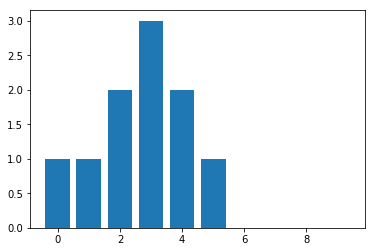

In [15]:
plt.bar(range(0,VALUE_SIZE),outBuffer0)